# Bandit Problem

In [12]:
# imports
from bandits import Bandit
import random
# Include your imports here, if any are used. 
import numpy as np
import matplotlib.pyplot as plt


A list of ten bandit objects initialized in the list...

In [13]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [14]:
bandits[0].pullLever()

1.6000315481338439

## Greedy algorithm Implementation

In [15]:
def run_greedy(n):
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    k=len(bandits)
    v=np.full(k,10.0)
    c=np.zeros(k)
    rwd=[]
    for i in range(n):
        best=np.argmax(v)
        reward=bandits[best].pullLever()
        rwd.append(reward)
        c[best]+=1
        v[best]=(v[best]*(c[best]-1))/c[best]
    return rwd
    pass

Plot the cumulative average of rewards as the number of iterations increases.

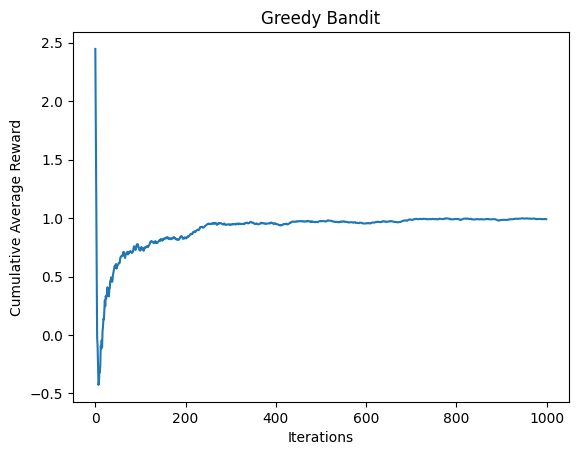

In [16]:
rewards = run_greedy(1000)
cum_avg = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
plt.plot(cum_avg)
plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.title("Greedy Bandit")
plt.show()


## $\epsilon$-greedy Algorithm

In [17]:
def run_epsilon_greedy(epsilon,n):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    k=len(bandits)
    v=np.full(k,10.0)
    c=np.zeros(k)
    rwd=[]
    for i in range(n):
        if random.random()<epsilon:
            arm=random.randrange(k)
        else:
            arm=np.argmax(v)
        reward=bandits[arm].pullLever()
        rwd.append(reward)
        c[arm]+=1
        v[arm]=(v[arm]*(c[arm]-1))/c[arm]
    return rwd
    pass

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

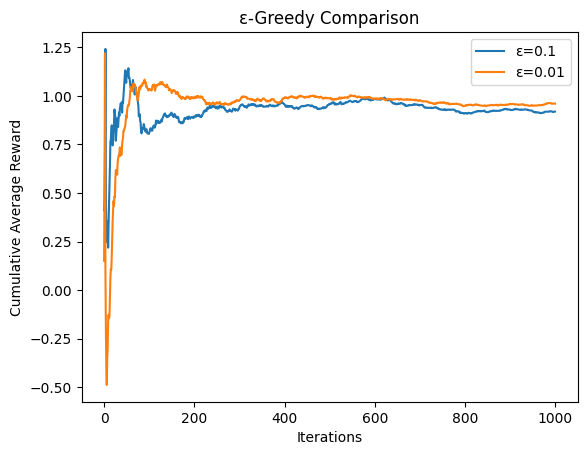

In [18]:
epsilons=[0.1,0.01]

for eps in epsilons:
    rewards = run_epsilon_greedy(eps,1000)
    cum_avg = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
    plt.plot(cum_avg, label=f"ε={eps}")

plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.legend()
plt.title("ε-Greedy Comparison")
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

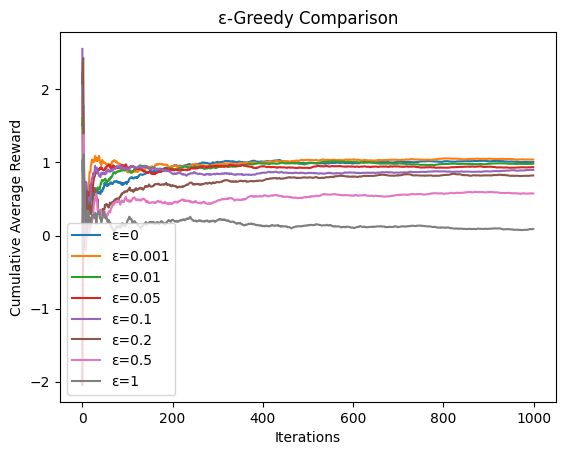

In [19]:
epsilons=[0,0.001,0.01,0.05,0.1,0.2,0.5,1]

for eps in epsilons:
    rewards = run_epsilon_greedy(eps,1000)
    cum_avg = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
    plt.plot(cum_avg, label=f"ε={eps}")

plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.legend()
plt.title("ε-Greedy Comparison")
plt.show()

## Optimistic Initial Values

In [20]:
def run_optimistic_greedy(n,ini):
    # TODO: Implement the optimistic greedy algorithm here

    # Return the reward from the bandits in a list
    k=len(bandits)
    v=np.ones(k)*ini
    c=np.zeros(k)
    rwd=[]
    for i in range(n):
        best=np.argmax(v)
        reward=bandits[best].pullLever()
        rwd.append(reward)
        c[best]+=1
        v[best]=(v[best]*(c[best]-1))/c[best]
    return rwd
    pass

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

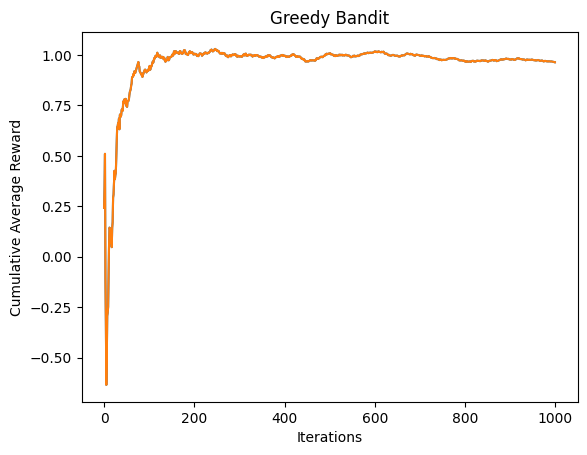

In [21]:
rewards = run_optimistic_greedy(1000,10)
cum_avg = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
plt.plot(cum_avg)
eps=0.1
rewards2 = run_epsilon_greedy(eps,1000)
cum_avg2 = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
plt.plot(cum_avg2, label=f"ε={eps}")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.title("Greedy Bandit")
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [22]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass